<a href="https://colab.research.google.com/github/catawbasam/catawbasam_sandbox/blob/master/2020_04_17_us_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Are States keeping up with their COVID-19 Testing?

Inspired by Meyer & Madrigal, "A New Statistic Reveals Why America's COVID-19 Numbers are Flat", The Atlantic, April 16, 2020
  
- author: Keith Campbell
- categories: [compare, tests, interactive, plotly, states, US, usa]
####- image: images/where-are-we-winning.png
####- permalink: /us-inflection/
- toc: true

modified from source: https://github.com/github/covid19-dashboard/blob/master/_notebooks/2020-03-30-us-inflection.ipynb


In [0]:
#hide
%matplotlib inline
import sys
import math
import requests
import pandas as pd
import numpy as np
from datetime import datetime

In [0]:
#hide
""" states_df0 columns: 
       'date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'hash', 'dateChecked', 'death', 'hospitalized', 'total',
       'totalTestResults', 'posNeg', 'fips', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease'

    use: 'positiveIncrease', 'totalTestResultsIncrease'   
"""
states_url = "https://covidtracking.com/api/states/daily"
case_threshold = 100 # TODO I don't want to drop states below 100

r = requests.get(states_url)
states_df0 = pd.DataFrame(r.json())
states_df0['date'] = pd.to_datetime(states_df0.date, format="%Y%m%d")
df0 = states_df0.reset_index()
df = df0[['date', 'state', 'positiveIncrease', 'negativeIncrease', 'totalTestResultsIncrease' ]].sort_values('date')

In [0]:
states_df0.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'hash', 'dateChecked', 'death', 'hospitalized', 'total',
       'totalTestResults', 'posNeg', 'fips', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease'],
      dtype='object')

In [0]:
df.head()

,date,state,positiveIncrease,negativeIncrease,totalTestResultsIncrease
2395,2020-02-28,WA,NaN,NaN,NaN
2394,2020-02-29,WA,9.0,0.0,9.0
2392,2020-03-01,RI,NaN,NaN,NaN
2391,2020-03-01,MI,NaN,NaN,NaN
2393,2020-03-01,WA,12.0,0.0,12.0


In [0]:
#hide
df = (df.assign(pos3=df.groupby('state', as_index=False)[['positiveIncrease']]
                                .rolling(3).mean()
                                .reset_index(0, drop=True)))
df = (df.assign(test3=df.groupby('state', as_index=False)[['testIncrease']]
                                .rolling(3).mean()
                                .reset_index(0, drop=True)))
df['perc_pos'] = 100*df.pos3/df.test3

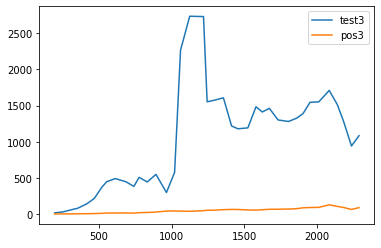

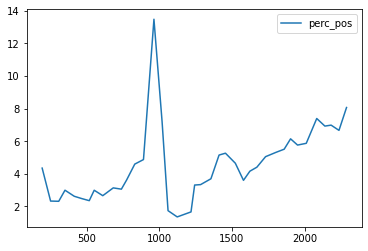

In [0]:
# need to exclude dates where cume test was 0
ST = 'MN'
df[df.state==ST][['test3','pos3']].plot();
df[df.state==ST][['perc_pos']].plot();


In [0]:
#hide
state_names = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AS": "American Samoa",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District Of Columbia",
    "FM": "Federated States Of Micronesia",
    "FL": "Florida",
    "GA": "Georgia",
    "GU": "Guam",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MH": "Marshall Islands",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "MP": "Northern Mariana Islands",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PW": "Palau",
    "PA": "Pennsylvania",
    "PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VI": "Virgin Islands",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming"
}

## Caveats

1. 
4. The true number of cases is unknown, so the actual slope of the log-log change plot is unknown. All states are also increasing their testing rate over time, so these data may imply that the infection rate is increasing faster than it actually is.
5. The data these plots rely on are incomplete, and come in less smoothly than they may imply. Healthcare systems around the world collect and report data when they can.
6. 